In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.gridliner import (LATITUDE_FORMATTER,
                                   LONGITUDE_FORMATTER)

In [2]:
# open netCDF dataset
ds = Dataset(
    '07-ARC-20191106_dm-metno-MODEL-topaz4-ARC-b20191028-fv02.0.nc')

# thats the variable we will plot
var_name = 'temperature'

# read variables into numpy matrices
lon, lat, x, y, d, var = [ds.variables[i][:].data for i in 
                          ['longitude',
                           'latitude',
                           'x',
                           'y',
                           'depth',
                           var_name]]

# mask invalid values in the variable for plotting
var[var == ds.variables[var_name]._FillValue] = np.nan

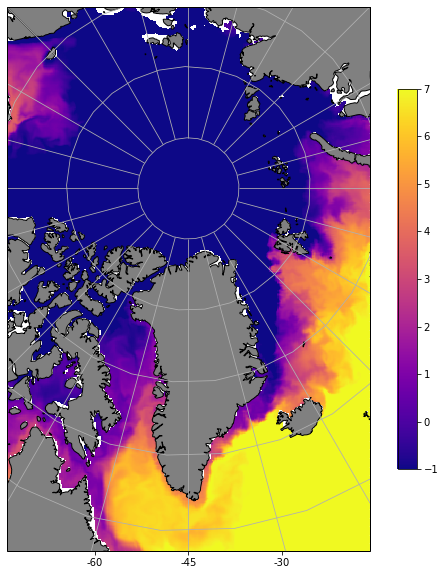

In [5]:
# create canvas for the figure
fig = plt.figure(figsize=(10, 10))

# prepare axes, specify projection for the plot
plot_crs = ccrs.Stereographic(central_latitude=90,
                              central_longitude=-45)
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)

# plot data, specify projection of data
data_crs = ccrs.Stereographic(central_latitude=90,
                              central_longitude=-45)
img=ax.pcolormesh(x*100000, y*100000, var[0,0],
            transform=data_crs,
            cmap='plasma',
            vmin=-1,
            vmax=7,
           )

# Decorate:
# set geographical limits (in default map units - meters)
ax.set_xlim([-2000000, 2000000])
ax.set_ylim([-4000000, 2000000])

# add colorbar
fig.colorbar(img, ax=ax, shrink=0.7)

# add landmask
land = NaturalEarthFeature(category='physical',
                           scale='50m',
                           name='land')
ax.add_feature(land,
               edgecolor='black',
               facecolor='gray')

# add gridlines
xlocs = np.linspace(0, 360, 25)
ylocs = np.linspace(50, 85, 6)
ax.gridlines(xlocs=xlocs, ylocs=ylocs)

# add X-ticks ( a bit tricky )
lon_mid, lat_bot = (ccrs.PlateCarree()
                    .transform_point(np.mean(ax.get_xlim()),
                                     ax.get_ylim()[0], plot_crs))
lon_ticks = np.array([-60, -45, -30])
lat_bot_ticks = lat_bot * np.ones_like(lon_ticks)
x_ticks, y_ticks, _ = plot_crs.transform_points(ccrs.PlateCarree(),
                                                lon_ticks,
                                                lat_bot_ticks).T
ax.set_xticks(x_ticks)
ax.set_xticklabels(lon_ticks)

plt.show()

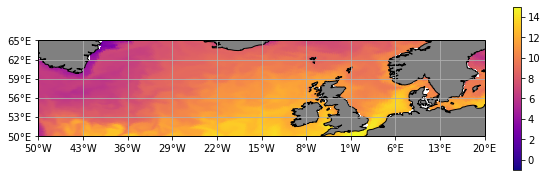

In [6]:
# create canvas for the figure
fig = plt.figure(figsize=(10, 10))

# prepare axes, specify projection for the plot
plot_crs = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)

# plot data, specify projection of data
data_crs = ccrs.Stereographic(central_latitude=90,
                              central_longitude=-45)
img=ax.pcolormesh(x*100000, y*100000, var[0,0],
            transform=data_crs,
            cmap='plasma',
            vmin=-1,
            vmax=15,
           )

# Decorate:
# set geographical limits (in default map units - meters)
ax.set_xlim([-30, 20])
ax.set_ylim([50, 65])

# add colorbar
fig.colorbar(img, ax=ax, shrink=0.3)

# add landmask
land = NaturalEarthFeature(category='physical',
                           scale='50m',
                           name='land')
ax.add_feature(land,
               edgecolor='black',
               facecolor='gray')

# add gridlines
xlocs = np.linspace(-50, 20, 11)
ylocs = np.linspace(50, 65, 6)
ax.gridlines(xlocs=xlocs,
             ylocs=ylocs)

# add ticks
ax.set_xticks(xlocs)
ax.set_yticks(ylocs)
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LONGITUDE_FORMATTER)

plt.show()


In [8]:
# open netCDF dataset
ds = Dataset(
    '07-ARC-20191106_dm-metno-MODEL-topaz4-ARC-b20191028-fv02.0.nc')

# thats the variable we will plot
var_name = 'temperature'

# read variables into numpy matrices
lon, lat, x, y, d, u, v = [ds.variables[i][:].data for i in 
                          ['longitude',
                           'latitude',
                           'x',
                           'y',
                           'depth',
                           'u',
                           'v',
                          ]]

# mask invalid values in the variable for plotting
u[u == ds.variables['u']._FillValue] = np.nan
v[v == ds.variables['v']._FillValue] = np.nan


In [9]:
u.shape

(1, 12, 881, 609)

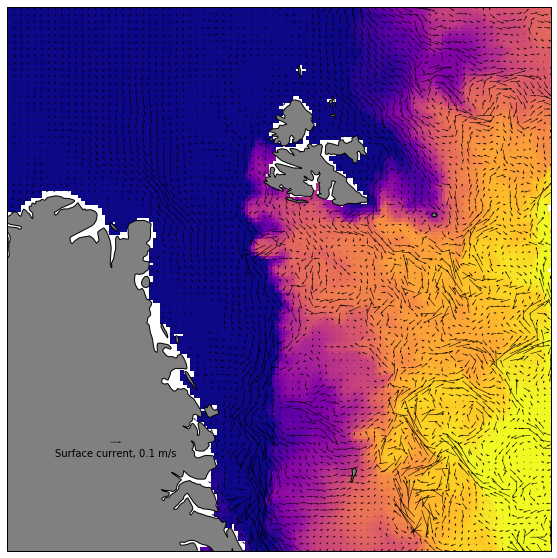

In [33]:
# create canvas for the figure
fig = plt.figure(figsize=(10, 10))

# prepare axes, specify projection for the plot
plot_crs = ccrs.Stereographic(central_latitude=90,
                              central_longitude=-45)
ax = fig.add_subplot(1, 1, 1, projection=plot_crs)

# plot data, specify projection of data
data_crs = ccrs.Stereographic(central_latitude=90,
                              central_longitude=-45)

img=ax.pcolormesh(x*100000, y*100000, var[0,0],
            transform=data_crs,
            cmap='plasma',
            vmin=-1,
            vmax=7,
           )

stp = 2
q = ax.quiver(x[::stp]*100000,
          y[::stp]*100000,
          u[0,0,::stp, ::stp],
          v[0,0,::stp, ::stp],
          transform=data_crs,
          scale=5,
          width=0.001
         )
qk = ax.quiverkey(q, X=0.2, Y=0.2, U=0.1,
             label='Surface current, 0.1 m/s', labelpos='S')

ax.set_xlim([0, 2000000])
ax.set_ylim([-2000000, 0])
# add landmask
land = NaturalEarthFeature(category='physical',
                           scale='50m',
                           name='land')
ax.add_feature(land,
               edgecolor='black',
               facecolor='gray')

plt.show()